In [3]:
import sqlalchemy
import pandas as pd

db_url = "sqlite:///data/storage/hypersql_new.sqlite"
engine = sqlalchemy.create_engine(db_url)

import os

evaluations = [file_name.split(".")[0] for file_name in os.listdir("data/predict/bird")]

dataset_table = "DATASET_{}"
evaluation_table = "DATASET_{}_EVALUATION_{}"

### Overall Score

In [4]:
SQL_TEMP = "SELECT avg(exec_acc) * 100.0 as exec_acc FROM {} d JOIN {} e ON d.id = e.id;"

results = list()

for evaluation in evaluations:
    sql = SQL_TEMP.format(dataset_table.format("bird_dev"), evaluation_table.format("bird_dev", evaluation))
    frame = pd.read_sql(sql, engine)
    res = frame.to_dict(orient="records")
    results.append({"name": f"{evaluation}", "exec": res[0]["exec_acc"]})
    
df = pd.DataFrame(results)
df = df.sort_values(by="exec",ascending=False)
df

,name,exec
1,DAIL_SQL_GPT_4,38.461538
0,C3_SQL_GPT35,28.748370
2,resdsql_text2sql_3b,26.205997
4,resdsql_text2sql_large,16.883963
3,resdsql_text2sql_base,15.971317


### Domain Split

In [6]:
SQL_TEMP = "SELECT db_domain as domain, avg(exec_acc) * 100.0 as exec_acc FROM {} d JOIN {} e ON d.id = e.id GROUP BY db_domain ORDER BY db_domain;"

results = list()

for evaluation in evaluations:
    sql = SQL_TEMP.format(dataset_table.format("spider_dev"), evaluation_table.format("spider_dev", evaluation))
    frame = pd.read_sql(sql, engine)
    res = frame.to_dict(orient="records")
    if len(results) == 0:
        for item in res:
            domain = item["domain"]
            exec_acc = item["exec_acc"]
            results.append({"domain": domain, f"{evaluation}": exec_acc})
    else:
        for item, result in zip(res, results):
            assert item["domain"] == result["domain"]
            result[f"{evaluation}"] = item["exec_acc"]

In [7]:
df = pd.DataFrame(results)
df

# graphix: document, music, transportation, competition

,domain,codellama_7b,deepseek_coder_7b,llama2_7b,starcoder_7b
0,battle,62.500000,75.000000,50.000000,50.000000
1,business,92.857143,95.238095,90.476190,88.095238
2,college,74.074074,78.703704,62.962963,75.925926
3,competition,66.129032,80.645161,58.064516,77.419355
4,document,91.666667,86.904762,71.428571,84.523810
5,entertainment,90.291262,92.233010,83.495146,88.349515
6,game,100.000000,100.000000,90.000000,80.000000
7,geography,49.166667,66.666667,42.500000,39.166667
8,government,86.666667,93.333333,86.666667,93.333333
9,music,96.666667,96.666667,90.000000,93.333333


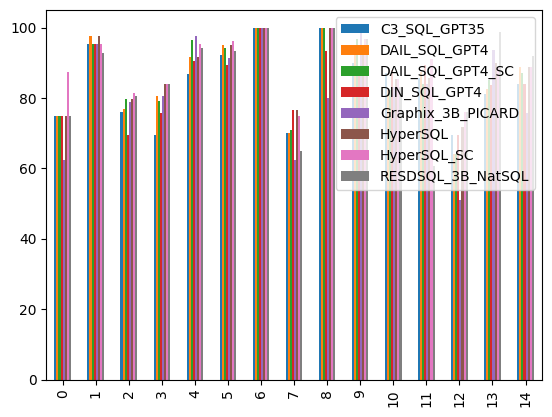

In [26]:
import matplotlib.pyplot as plt

df.plot(kind="bar")

plt.show()

In [33]:
SQL_TEMP = "SELECT db_domain as domain, avg(exec_acc) * 100.0 as exec_acc FROM {} d JOIN {} e ON d.id = e.id WHERE db_domain in (SELECT DISTINCT db_domain FROM DATASET_spider_train) GROUP BY db_domain ORDER BY db_domain;"

results = list()

for evaluation in ["Graphix_3B_PICARD", "RESDSQL_3B_NatSQL"]:
    sql = SQL_TEMP.format(dataset_table.format("spider_dev"), evaluation_table.format("spider_dev", evaluation))
    frame = pd.read_sql(sql, engine)
    res = frame.to_dict(orient="records")
    if len(results) == 0:
        for item in res:
            domain = item["domain"]
            exec_acc = item["exec_acc"]
            results.append({"domain": domain, f"{evaluation}": exec_acc})
    else:
        for item, result in zip(res, results):
            assert item["domain"] == result["domain"]
            result[f"{evaluation}"] = item["exec_acc"]

In [34]:
df = pd.DataFrame(results)
df

# graphix: business, document, music, social

,domain,Graphix_3B_PICARD,RESDSQL_3B_NatSQL
0,business,95.238095,92.857143
1,college,78.703704,80.555556
2,competition,80.645161,83.870968
3,document,97.619048,94.047619
4,entertainment,91.262136,93.203883
5,game,100.000000,100.000000
6,geography,62.500000,65.000000
7,government,80.000000,100.000000
8,music,100.000000,96.666667
9,social,83.928571,60.714286


In [35]:
SQL_TEMP = "SELECT db_domain as domain, avg(exec_acc) * 100.0 as exec_acc FROM {} d JOIN {} e ON d.id = e.id WHERE db_domain not in (SELECT DISTINCT db_domain FROM DATASET_spider_train) GROUP BY db_domain ORDER BY db_domain;"

results = list()

for evaluation in ["Graphix_3B_PICARD", "RESDSQL_3B_NatSQL"]:
    sql = SQL_TEMP.format(dataset_table.format("spider_dev"), evaluation_table.format("spider_dev", evaluation))
    frame = pd.read_sql(sql, engine)
    res = frame.to_dict(orient="records")
    if len(results) == 0:
        for item in res:
            domain = item["domain"]
            exec_acc = item["exec_acc"]
            results.append({"domain": domain, f"{evaluation}": exec_acc})
    else:
        for item, result in zip(res, results):
            assert item["domain"] == result["domain"]
            result[f"{evaluation}"] = item["exec_acc"]

In [36]:
df = pd.DataFrame(results)
df

# graphix: business, document, music, social

,domain,Graphix_3B_PICARD,RESDSQL_3B_NatSQL
0,battle,62.500000,75.000000
1,pet,83.064516,83.064516


### count_logical_connecter

In [29]:
SQL_TEMP = "SELECT count_logical_connecter as count_logical_connecter, avg(exec_acc) * 100.0 as exec_acc FROM {} d JOIN {} e ON d.id = e.id GROUP BY count_logical_connecter ORDER BY count_logical_connecter;"

results = list()

for evaluation in evaluations:
    sql = SQL_TEMP.format(dataset_table.format("spider_dev"), evaluation_table.format("spider_dev", evaluation))
    frame = pd.read_sql(sql, engine)
    res = frame.to_dict(orient="records")
    if len(results) == 0:
        for item in res:
            domain = item["count_logical_connecter"]
            exec_acc = item["exec_acc"]
            results.append({"count_logical_connecter": domain, f"{evaluation}": exec_acc})
    else:
        for item, result in zip(res, results):
            assert item["count_logical_connecter"] == result["count_logical_connecter"]
            result[f"{evaluation}"] = item["exec_acc"]

In [30]:
df = pd.DataFrame(results)
df

# DINSQL N=1/2 高于更优的方法，推理能力更强
# LLM-based > PLM-based(all zeros)

,count_logical_connecter,C3_SQL_GPT35,DAIL_SQL_GPT4,DAIL_SQL_GPT4_SC,DIN_SQL_GPT4,Graphix_3B_PICARD,HyperSQL,HyperSQL_SC,RESDSQL_3B_NatSQL
0,0,82.733051,85.063559,85.275424,83.368644,83.050847,87.605932,88.877119,85.805085
1,1,79.268293,64.634146,68.292683,78.048780,64.634146,70.731707,71.951220,73.170732
2,2,25.000000,37.500000,37.500000,62.500000,0.000000,37.500000,25.000000,0.000000


### QUR

In [38]:
SQL_TEMP = "SELECT avg(exec_acc) as exec_acc FROM (SELECT gold, IIF(SUM(exec_acc)==2, 1, 0) as exec_acc FROM {} d JOIN {} e ON d.id = e.id GROUP BY gold HAVING count(gold) == 2 ORDER BY gold)"

results = list()

for evaluation in evaluations:
    sql = SQL_TEMP.format(dataset_table.format("spider_dev"), evaluation_table.format("spider_dev", evaluation))
    frame = pd.read_sql(sql, engine)
    res = frame.to_dict(orient="records")
    if len(results) == 0:
        for item in res:
            exec_acc = item["exec_acc"]
            results.append({f"{evaluation}": exec_acc})
    else:
        for item, result in zip(res, results):
            result[f"{evaluation}"] = item["exec_acc"]

In [41]:
df = pd.DataFrame(results)
df
# grapix > LLM-based ?

,C3_SQL_GPT35,DAIL_SQL_GPT4,DAIL_SQL_GPT4_SC,DIN_SQL_GPT4,Graphix_3B_PICARD,HyperSQL,HyperSQL_SC,RESDSQL_3B_NatSQL
0,0.760684,0.773504,0.779915,0.784188,0.788462,0.809829,0.816239,0.82265
